### Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

### Yield Curves

Yield curves are a snapshot of interest rates in that market—a simple yet often informative graph that plots yields to maturity on the vertical axis and times to maturity on the horizontal axis for a homogeneous set of securities.

The idea of any yield curve in principle is to display visually the relationship between interest rates on securities that are alike on all dimensions except maturity. Ideally, all the observations would be for securities that have the same credit risk, same liquidity, same periodicity, and same tax status. 

Most yield curves are based on government securities. That’s so we can hold constant all the listed factors other than time to maturity that impact investors’ required rates of return. The yields to maturity ideally would be for zero‐coupon securities so that coupon reinvestment risk is not a factor.

There is no perfect data set for term structure analysis. Typically seen yield curves are plots of street convention yields on coupon-bearing Treasury notes and bonds instead of yields on Treasury STRIPS. In particular, the yields displayed usually are for on‐the‐run issues (i.e., the most recently auctioned Treasury securities). These are actively traded and typically are priced close to par value, thereby minimizing the effects of the deferral for tax purposes of the gains and losses from buying at a discount or a premium. The problem is that there are gaps in the times to maturity, so some yields have to be interpolated.

### Forward Curve Intuition

Suppose that yields to maturity on 1‐year, 2‐year, and 3‐year zero‐coupon government bonds are 1.00%, 2.00%, and 2.50%, respectively (quoted on semiannual basis). These rates are *0y1y*, *0y2y*, *0y3*, (*0y* securities trade in the "cash market"). The first number is the starting date or read as "years ahead" and the second number is the tenor of the bond.

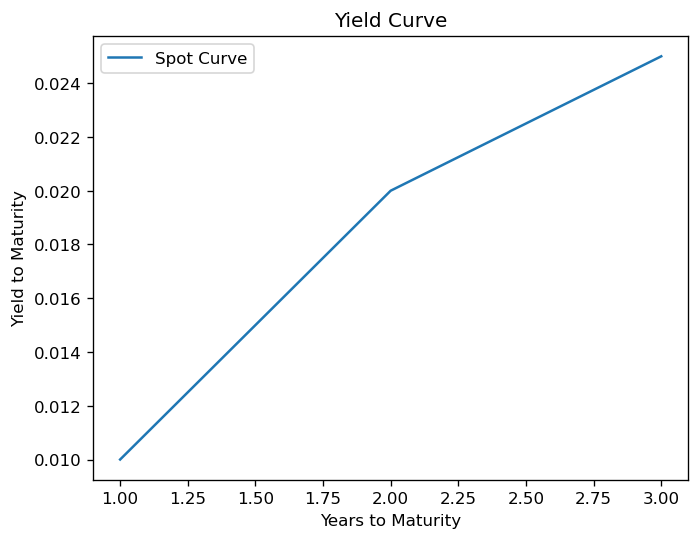

In [4]:
plt.figure(num=0, dpi=120)
plt.plot(np.array([1, 2, 3]), np.array([0.01, 0.02, 0.025]), label="Spot Curve")
plt.title('Yield Curve')
plt.xlabel('Years to Maturity')
plt.ylabel('Yield to Maturity')
plt.legend()

We can use the simple yield curve to infer the 1y1y, 1y2y, and 2y1y forward rates. These are implied yields on the 1-year bonds starting from one year and two years into the future (i.e. forward in time). 

At what rate must one be able to reinvest the proceeds of an investment in a shorter‐term bond to equal the proceeds of an investment in a longer‐term bond? The answer to this question is an Implied Forward Rate (IFR). 

Intuitively, the 1y1y IFR must be about 3.00% and the 2y1y IFR must be about 3.50% (ignore compounding for the this section). The idea is that if an investor can buy a 1‐year bond to yield 1.00% and reinvest for the second year at 3.00% (1y1y), the total return matches that of 2.00% per year on the 2‐year bond. Likewise, if an investor can buy the 2‐year at 2.00% and reinvest for the third year at 3.50% (2y1y), the same total return is obtained as on buying the 3‐year bond at 2.50%. Similarly, if a 1-year bond is purchased earning 1.00% for the first year and the proceeds are reinvested for the next two years at 3.25% per year (1y2y), the strategy produces the same return over the three years as buying the 3-year bond at an annual yield of 2.50%.

The simplified calculation (neglecting compounding) can be formalized as follows: let $Rate_{0yAy}$ be the shorter-term rate for the 0yAy time period, $Rate_{0yBy}$ for the longer-term rate for 0yBy period, and $Rate_{Ay(B-A)y}$ the implied forward rate starting from Ay for a tenor of B-Ay. 

$$Rate_{0yBy} \approx \left(\frac{AYears}{BYears}\times Rate_{0yAy}\right) + \left(\frac{BYears - A Years}{BYears}\times Rate_{Ay(B-A)y}\right)$$
$$Rate_{Ay(B-A)y} \approx \frac{BYears \times Rate_{0yBy} - AYears \times Rate_{0yAy}}{BYears-AYears}$$


The *longer‐term rate is a weighted average of the shorter‐term rate and the implied forward rate*, whereby the *weights are the shares of the overall time frame*.

In [5]:
def approx_ifr(short_rate, short_period, long_rate, long_period):
  return (long_period * long_rate - short_period * short_rate) / (long_period - short_period)

ifr_1y1y = approx_ifr(0.01, 1, 0.02, 2)
print(f'{ifr_1y1y = :0.2%}')
ifr_1y2y = approx_ifr(0.01, 1, 0.025, 3)
print(f'{ifr_1y2y = :0.2%}')
ifr_2y1y = approx_ifr(0.02, 2, 0.025, 3)
print(f'{ifr_2y1y = :0.2%}')

ifr_1y1y = 3.00%
ifr_1y2y = 3.25%
ifr_2y1y = 3.50%


The analogy of the implied forward rate is the same as the marginal cost (MC) and average cost (AC) in macroeconomics. The marginal cost curve intersects the average cost curve at its lowest point because the increasing marginal cost curve pulls the average cost down until the marginal cost increases past the average cost and begins to pull up the average cost curve, thus intersecting at the lowest point on the average cost curve.

Similarly, the buyer of a 2-year bond at 2.00% obtains an incremental, or marginal, return of 3.00% for the second year after earning 1.00% for the first year. The buyer of the 3‐year at 2.50% gets a marginal return of 3.50% for the third year after earning 2.00% for the first two years (or a 1‐year rate of 1.00% followed by 3.00%). This leads naturally to using the implied forward rate in **maturity choice decisions**. The issue will be how **one’s own expectation for a future rate compares to that priced into the forward curve**.

Consider an investor who has a known, certain 2‐year horizon and can buy any of these three zero‐coupon government bonds. The obvious strategy is to buy the 2‐year zero at 2.00% and lock in the rate of return (barring default on the government bond and neglecting inflation). But our investor might consider “riding the yield curve” and buy the 3‐year at 2.50%. The hope is that the yield at the time of sale is “low” (and the sale price is “high”). How low? Lower than 3.50%, the 2y1y IFR. The companion fear is that the yield is above 3.50%. Our investor might also consider buying the 1‐year at 1.00% and hope that rates rise for the second year. How high? Higher than 3.00%, the 1y1y implied forward rate. The risk is that the reinvestment rate is less than 3.00%. The forward curve is the benchmark for your hopes and fears.

The key point is that the investor’s maturity choice decision depends, in part at least, on the held view on future cash market rates vis‐à‐vis the implied forward rates. Other factors undoubtedly matter as well—the risk of underperforming the obvious maturity‐matching strategy, the cost of reinvesting cash, the cost and risk of having to sell the bond at the horizon date. In any case, implied forward rates provide information useful in making the decision.

### Theories of The Term Structure of Interest Rates

1. **Expectations Theory**: This theory posits that the shape of the yield curve reflects market participants' expectations about future short-term interest rates because investors (maximize expected rate of return) and issuers (minimize cost of borrowed funds) want to maximize outcomes. An upward-sloping yield curve suggests rising future rates, a downward-sloping curve indicates falling rates, while a flat curve indicates steady interest rates. The key assumption is that investors are *risk-neutral*, and the implied forward rate represents an unbiased forecast of future spot rates.
   1. **Key Assumption**: Investors are risk-neutral, meaning they do not demand additional compensation for holding long-term bonds over short-term ones. They are indifferent to the risk of future interest rate changes (the standard deviation), so they base their decisions entirely on expected returns (mean return).
   2. **Implication**: The yield curve reflects market expectations about future short-term interest rates. An upward-sloping yield curve means that short-term rates are expected to rise in the future, while a downward-sloping curve means they are expected to fall.
   3. **Forward Rates**: The forward rate (the rate implied by current long-term rates) is considered an unbiased predictor of future short-term rates. There is no risk premium.
2. **Segmented Markets Theory**: This theory suggests that the bond market is divided into segments based on maturities, and investors and issuers operate only within their preferred segment. As a result, the yield curve is determined by supply and demand conditions in each maturity segment independently, with no connection between short- and long-term rates. Risk aversion prevents investors from shifting between segments, so forward rates do not predict future short-term rates.
   1. **Key Assumption**: Investors and borrowers have strong preferences for certain maturities and typically do not switch between short-term and long-term bonds. Each maturity segment (short-term, medium-term, long-term) operates independently based on its own supply and demand.
   2. **Implication**: The yield curve is shaped by the independent supply and demand conditions in each segment, rather than expectations about future interest rates. For example, if there is more demand for short-term bonds, their yields may be lower than long-term bonds, even if future short-term rates are expected to remain unchanged.
   3. **No Relationship Between Segments**: Since investors don’t move between segments, short-term and long-term rates are determined separately. The forward rate does not predict future short-term rates.
3. **Liquidity Preference Theory**: This theory builds on the Expectations Theory by recognizing that investors are risk-averse and prefer short-term bonds due to their lower risk. To compensate for the increased risk of holding longer-term bonds (which are more sensitive to interest rate changes), investors demand a "liquidity premium." This results in an upward-sloping yield curve even when future short-term rates are expected to remain steady. The forward rate, therefore, tends to overestimate the expected future short-term rate due to this risk premium.
   1. **Key Assumption**: Investors are risk-averse and prefer short-term bonds because they are less risky (less sensitive to interest rate fluctuations). To hold long-term bonds, investors demand a liquidity premium as compensation for the higher risk.
   2. **Implication**: Even if investors expect future short-term rates to remain steady, the yield curve is typically upward-sloping because of the liquidity premium attached to long-term bonds. Longer-term bonds require higher yields to attract investors due to their greater risk.
   3. **Forward Rates Overestimate**: The forward rate reflects both expected future short-term rates and the liquidity premium. This means the forward rate tends to overestimate future short-term rates since it includes compensation for risk. If it were somehow possible to extract each risk premium, we would have the "core yield" curve based only on expectations. However, with liquidity premiums built into the implied forward rates, forward rates are overestimates of the future rates.

**In Summary**:
1. **Expectations Theory**: The yield curve reflects pure expectations of future short-term rates, with no premium for risk.
2. **Segmented Markets Theory**: The yield curve is shaped by separate supply and demand dynamics in each maturity segment, independent of expectations about future rates.
3. **Liquidity Preference Theory**: The yield curve reflects both expectations of future short-term rates and a premium for holding longer-term, riskier bonds.

### Implied Forward Curve

An accurate formula for implied forwards that includes compounding for specific periodicity (PER) for the yields is based on the expression shown below:

$$i_{t_{1},t_{2}}=\left[\frac{(1+i_{t_{0},t_{2}})^{t_{2}-t_{0}}}{(1+i_{t_{0},t_{1}})^{t_{1}-t_{0}}}\right]^{\frac{1}{(t_{2}-t_{1})}}-1$$

$$(1+i_{t_{0},t_{2}})^{t_{2}-t_{0}}=(1+i_{t_{0},t_{1}})^{t_{1}-t_{0}} (1+i_{t_{1},t_{2}})^{t_{2}-t_{1}}$$

$$\left(1+\frac{Rate_{t_{0},t_{1}}}{Per}\right)^{(t_{1}-t_{0})} \times \left(1+\frac{Rate_{t_{1},t_{2}}}{Per}\right)^{(t_{2}-t_{1})}  = \left(1+\frac{Rate_{t_{0},t_{2}}}{Per}\right)^{(t_{2}-t_{0})} $$

$$Rate_{t_{1},t_{2}} = \left(\left[\frac{\left(1+\frac{Rate_{t_{0},t_{2}}}{Per}\right)^{(t_{2}-t_{0})}}{\left(1+\frac{Rate_{t_{0},t_{1}}}{Per}\right)^{(t_{1}-t_{0})}}\right]^{\frac{1}{(t_{2}-t_{1})}} - 1 \right) \times Per$$

$t_{A},t_{B}$ or *AyBy* or *AmBy* mean: A years ahead (forward time period/starting period), B tenor of the underlying security

The first term is the proceeds per unit invested for $t_{1}$ years assuming that the $t_{0},t_{1}$ rate is an APR quoted for PER periods per year. That amount is reinvested for the remaining time period out to year $t_{2} - t_{1}$ (i.e., at the $t_{1},t_{2}$ implied forward rate). The compounded total return equals the proceeds per unit invested for $t_{2}$ years at the $t_{0},t_{2}$ rate. It is important that all three rates are annualized for the same periodicity.

[FRED Reference](https://fredblog.stlouisfed.org/2023/05/constructing-forward-interest-rates-in-fred/)

Note that the formulas are appropriate for bond yields and not money market rates as these require some modifications.

In [6]:
def ifr(rate_t0t1, t1, rate_t0t2, t2, t0 = 0, per=2):
    t2_term = (1 + rate_t0t2/per)**(t2 - t0)
    t1_term = (1 + rate_t0t1/per)**(t1 - t0) 
    return ((t2_term / t1_term)**(1/(t2 - t1)) - 1) * per

ifr_1y1y = ifr(0.01, 1, 0.02, 2)
print(f'{ifr_1y1y = :0.4%}')
ifr_1y2y = ifr(0.01, 1, 0.025, 3)
print(f'{ifr_1y2y = :0.4%}')
ifr_2y1y = ifr(0.02, 2, 0.025, 3)
print(f'{ifr_2y1y = :0.4%}')

ifr_1y1y = 3.0050%
ifr_1y2y = 3.2542%
ifr_2y1y = 3.5037%


### Money Market Implied Forward Rates

Money market instrument rates have different periodicities and the basis in which the forward rate is quoted should match the manner in which a similar security would be quoted and traded. Thus, the function to compute the implied forward rate for add-on rates and discount rates are as following:

IFR on an Add-On Basis (bank CDs, LIBOR, repos):
$$\left[1+\left(AOR_{t_{0},t_{1}}\frac{t_{1} Days}{Year}\right)\right] \times \left[1+\left(AOR_{t_{1},t_{2}}\frac{t_{2} - t_{1} Days}{Year}\right)\right]  = \left[1+\left(AOR_{t_{0},t_{2}}\frac{t_{2} Days}{Year}\right)\right] $$

$$AOR_{t_{1},t_{2}} = \left[\frac{t_{2} Days \times AOR_{t_{0},t_{2}} - t_{1} Days \times AOR_{t_{0},t_{1}}}{t_{2} - t_{1} Days}\right] \times \left[\frac{1}{1 + \left(AOR_{t_{0},t_{1}}\times \frac{t_{1} Days}{Year}\right)}\right]$$

IFR on a Discount Rate Basis (commercial paper, bankers acceptances, and Treasury bills in the U.S):
$$\left[1-\left(DR_{t_{0},t_{1}}\frac{t_{1} Days}{Year}\right)\right] \times \left[1-\left(DR_{t_{1},t_{2}}\frac{t_{2} - t_{1} Days}{Year}\right)\right]  = \left[1-\left(DR_{t_{0},t_{2}}\frac{t_{2} Days}{Year}\right)\right] $$

$$DR_{t_{1},t_{2}} = \left[\frac{t_{2} Days \times DR_{t_{0},t_{2}} - t_{1} Days \times DR_{t_{0},t_{1}}}{t_{2} - t_{1} Days}\right] \times \left[\frac{1}{1 - \left(DR_{t_{0},t_{1}}\times \frac{t_{1} Days}{Year}\right)}\right]$$


Suppose that 90‐day LIBOR is 1.00% (periodicity of 4) and 180‐day LIBOR is 2.00% (periodicity of 2). What rate would a true believer in the expectations theory of the yield curve anticipate for 90‐day LIBOR, 90 days into the future (*90d90d*)?

In [7]:
# Implied Forward Curve - MM Add-On & Discount Rate
def ifr_mm(aor_t0t1, t1, aor_t0t2, t2, t0 = 0, year=360, aor=True):
    rollover_avg = (t2 * aor_t0t2 - t1 * aor_t0t1) / (t2 - t1)
    adjust = 1/(1 + (aor_t0t1 * t1/year)) if aor else 1/(1 - (aor_t0t1 * t1/year))
    return rollover_avg * adjust


d90 = 90
r90 = 0.01
d180 = 180
r180 = 0.02
year = 360

# IFR - Add-On Rate
ifr_90d90d = ifr_mm(r90, d90, r180, d180, 0, 360, True)
print(f'{ifr_90d90d = : 0.4%}')

d180 = 180
r180 = 0.1
d360 = 360
r360 = 0.2
year = 360

ifr_180d180d = ifr_mm(r180, d180, r360, d360, 0, 360, True)
print(f'{ifr_180d180d = : 0.4%}')

ifr_90d90d =  2.9925%
ifr_180d180d =  28.5714%


In [8]:
d90 = 90
r90 = 0.01
d180 = 180
r180 = 0.02
year = 360

# IFR - Discount Rate
ifr_90d90d = ifr_mm(r90, d90, r180, d180, 0, 360, False)
print(f'{ifr_90d90d = : 0.4%}')

d180 = 180
r180 = 0.1
d360 = 360
r360 = 0.2
year = 360

ifr_180d180d = ifr_mm(r180, d180, r360, d360, 0, 360, False)
print(f'{ifr_180d180d = : 0.4%}')

ifr_90d90d =  3.0075%
ifr_180d180d =  31.5789%


### Implied Spot (Zero-Coupon) Rates

Implied spot curve is the sequence of spot (or zero‐coupon) rates that are consistent with the prices and yields on coupon bonds.

Building the implied spot curve is a great example of **“bootstrapping”** in that the result of one calculation is used in the subsequent one. This is not going to involve a specifi c formula; instead it is a process best learned by working through an example.

Suppose that we observe price and yield data on four actively traded benchmark securities for the same risk class, for instance, government bonds.

| Maturity (Years) | Coupon Rate | Price (% of Par Value) | Yield to Maturity |
| ---------------- | ----------- | ---------------------- | ----------------- |
| 1                | 0%          | 97.0625                | 3.0264%           |
| 2                | 3.25%       | 100.8750               | 2.7941%           |
| 3                | 4.50%       | 102.7500               | 3.5181%           |
| 4                | 4.00%       | 99.3125                | 4.1902%           |

We need some simplifying *assumptions* to illustrate bootstrapping:
- We require a starting place in the money market where we observe the pricing on a short‐term zero‐coupon bond. Here the 1‐year represents the **starter zero**. But keep in mind that in practice we would use the price on a **T‐bill or commercial paper or a time deposit that pays LIBOR** which is obtained from the money market.
- The 2‐year, 3‐year, and 4‐year bonds are assumed make **annual coupon payments** to simplify the example. 
- Assume that **we are on a coupon date and the payment has just been made** so that there is **no accrued interest**.
  - In general, you would need to use the total current market value including accrued interest on the left side of the equation.
- The internal rates of return are street convention yields for a periodicity of 1 (i.e., they are **effective annual rates**).

In [9]:
def bond_yield(years, coupon, price, face=100):
    if coupon == 0:
        return face/price - 1
    
    def bond_price(rate, years, coupon, face=100):
        old_settings = np.seterr(invalid='ignore')
        pvPMT = np.where(rate == 0, years, np.divide(1 - (1+rate)**-years, rate)) * coupon
        np.seterr(**old_settings)
        pvFV = face / (1 + rate)**years
        return pvPMT + pvFV
    def f(x):
        return bond_price(rate=x, years=years, coupon=coupon, face=face) - price
    
    root = newton(f, 0, disp=False)
    
    return root

years = np.array([1, 2, 3, 4])
coupon = np.array([0, 3.25, 4.5, 4])
price = np.array([97.0625, 100.875, 102.75, 99.3125])
face = np.full(4, 100)
ytm = np.vectorize(bond_yield)(years, coupon, price, face)
print(ytm)

[0.03026401 0.0279408  0.03518092 0.04190249]


We know the 0y1y zero-coupon/spot rate is 3.0264%. Using this we will bootstrap the spot rates for rest of the maturities. 

**0y2y**: The implied 2‐year spot rate (the 0y2y) is 2.7903%; it is the solution for *z* in the below expression. The algebra problem is to find the 2‐year spot rate such that when the second cash flow is discounted by that rate, the sum is the price of the bond.

$$100.8750 = \frac{3.25}{1.030264} + \frac{103.25}{(1+\mathit{z})^{2}}, \mathit{z} = 0.027903$$

**0y3y**: The implied 3‐year spot rate 0y3y is 3.5476%. Our 0y2y result is now an input into the equation and is used to discount the second cash flow. This is what is meant by bootstrapping the curve.

$$102.7500 = \frac{4.50}{1.030264} +  \frac{4.50}{(1.027903)^{2}} +  \frac{104.50}{(1+\mathit{z})^{3}}, \mathit{z} = 0.035476$$

**0y4y**: The implied 4-year spot rate (the 0y4y) is 4.2525%. The formula uses the inital 0y1y starter zero and the 0y2y and 0y3y implied rates. 

$$99.3125 = \frac{4}{1.030264} +  \frac{4}{(1.027903)^{2}} + \frac{4}{(1.035476)^{3}} +  \frac{104}{(1+\mathit{z})^{3}}, \mathit{z} = 0.042525$$

In [10]:
def spot_rate(years, coupon, spots, price, face):
    pvPMT = np.sum(np.full(years-1, coupon) * ((1 + spots)**-np.arange(1,years)))
    return ((face + coupon) / (price - pvPMT))**(1/years) - 1

spots = [ytm[0]]
for i in range(1,len(ytm)):
    spots.append(spot_rate(years[i], coupon[i], np.array(spots), price[i], face[i]))

spots = np.array(spots)
print(spots)

[0.03026401 0.0279033  0.03547566 0.04252524]


These equations demonstrate why a yield‐to‐maturity statistic can be interpreted as a “present value average” of the zero‐coupon rates. Consider the 4‐year bond in this example. Its price is the sum of the discounted cash fl ows using either the yield to maturity or the sequence of spot rates.

$$\frac{4}{1.030264} +  \frac{4}{(1.027903)^{2}} + \frac{4}{(1.035476)^{3}} +  \frac{104}{(1.042525)^{3}} = 99.3125$$

$$\frac{4}{1.041902} +  \frac{4}{(1.041902)^{2}} + \frac{4}{(1.041902)^{3}} +  \frac{104}{(1.041902)^{3}} = 99.3125$$

Here 4.1902% is a “weighted average” of 3.0264%, 2.7903%, 3.5476%, and 4.2525%, with most of the weight on the last spot rate because it corresponds to the largest cash flow.